
=== scikit-learn LinearRegression results ===

Intercept: 22.796535
CRIM: -1.004201
ZN: 0.664110
INDUS: -0.181698
CHAS: 0.821788
NOX: -1.883002
RM: 3.367430
AGE: -0.531696
DIS: -3.238843
RAD: 1.911614
TAX: -1.518703
PTRATIO: -1.972284
B: 1.121454
LSTAT: -3.049904

MSE: 25.017672, RMSE: 5.001767, R^2: 0.658852



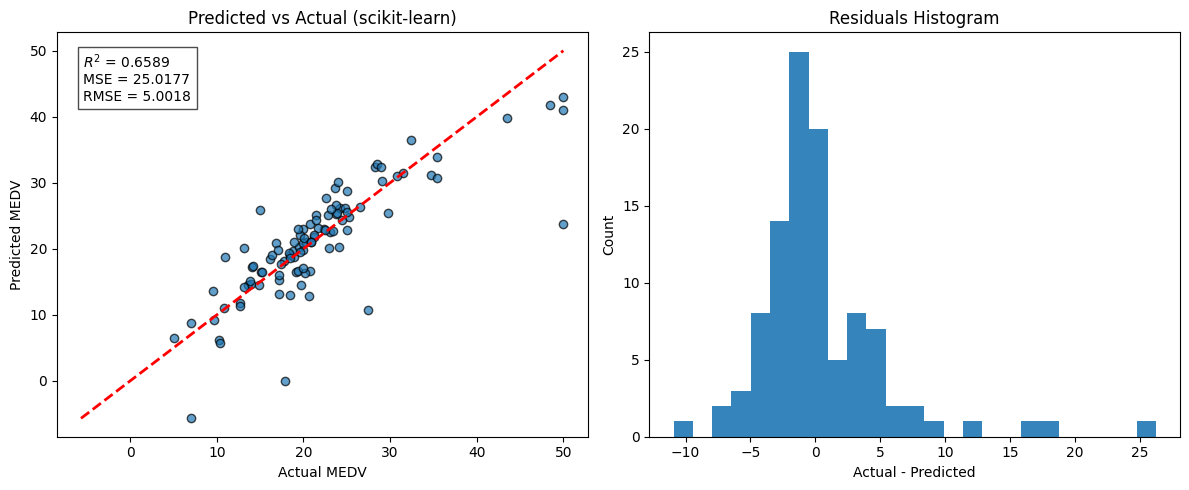

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

CSV_PATH = r"C:\Users\aparn\Downloads\archive (1)\HousingData.csv"

df = pd.read_csv(CSV_PATH)

possible_target_names = ['MEDV','medv','PRICE','price','target','Target']
target_col = None
for c in df.columns:
    if c in possible_target_names:
        target_col = c
        break
if target_col is None:
    for c in df.columns:
        if 'med' in c.lower() or 'price' in c.lower() or 'target' in c.lower():
            target_col = c
            break
if target_col is None:
    raise ValueError("Could not find target column in dataset")

X = df.drop(columns=[target_col])
y = df[target_col].astype(float)

X = pd.get_dummies(X, drop_first=True)

imputer = SimpleImputer(strategy="mean")
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n=== scikit-learn LinearRegression results ===\n")
print(f"Intercept: {model.intercept_:.6f}")
for fname, coef in zip(X.columns, model.coef_):
    print(f"{fname}: {coef:.6f}")
print(f"\nMSE: {mse:.6f}, RMSE: {rmse:.6f}, R^2: {r2:.6f}\n")

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(y_test, y_pred, alpha=0.7, edgecolor='k')
mn, mx = min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())
plt.plot([mn, mx], [mn, mx], 'r--', lw=2)
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Predicted vs Actual (scikit-learn)")
plt.text(0.05, 0.95, f"$R^2$ = {r2:.4f}\nMSE = {mse:.4f}\nRMSE = {rmse:.4f}",
         transform=plt.gca().transAxes, verticalalignment='top',
         bbox=dict(facecolor='white', alpha=0.7))

residuals = y_test - y_pred
plt.subplot(1,2,2)
plt.hist(residuals, bins=25, alpha=0.9)
plt.title("Residuals Histogram")
plt.xlabel("Actual - Predicted")
plt.ylabel("Count")

plt.tight_layout()
plt.show()
